## Density Matrices

This notebook is part of a series exploring topics in quantum information.  
The material presented here is primarily based on:
- John Watrous' *General Formulation of Quantum Information* 
- *Quantum Computing and Quantum Information* by Michael A. Nielsen and Isaac L. Chuang  

Any errors or misinterpretations are my own.


##  Motivation

Up until now, quantum state vectors have been sufficient for understanding many foundational results in quantum computing, including Shor’s Algorithm, Deutsch-Jozsa Algorithm, Grover’s Algorithm, and more. In these cases, we describe quantum states using ket notation (e.g., 
∣
𝜓
⟩
∣ψ⟩) and apply unitary operations represented by matrices such as the Pauli operators, Hadamard gate, and other quantum gates.

Given this, it might seem odd that we now introduce density matrices to describe quantum states. After all, up to this point, matrices have primarily been used to represent quantum operations, such as unitary evolutions or measurement operators. Why, then, do we need a matrix-based representation for quantum states themselves?

The need for density matrices arises in situations where the standard state vector formalism is insufficient. Specifically:

* Beyond Pure States: In many realistic scenarios, a quantum system is not in a well-defined pure state but rather in a statistical mixture of states. Density matrices allow us to describe both pure and mixed states within a single framework.
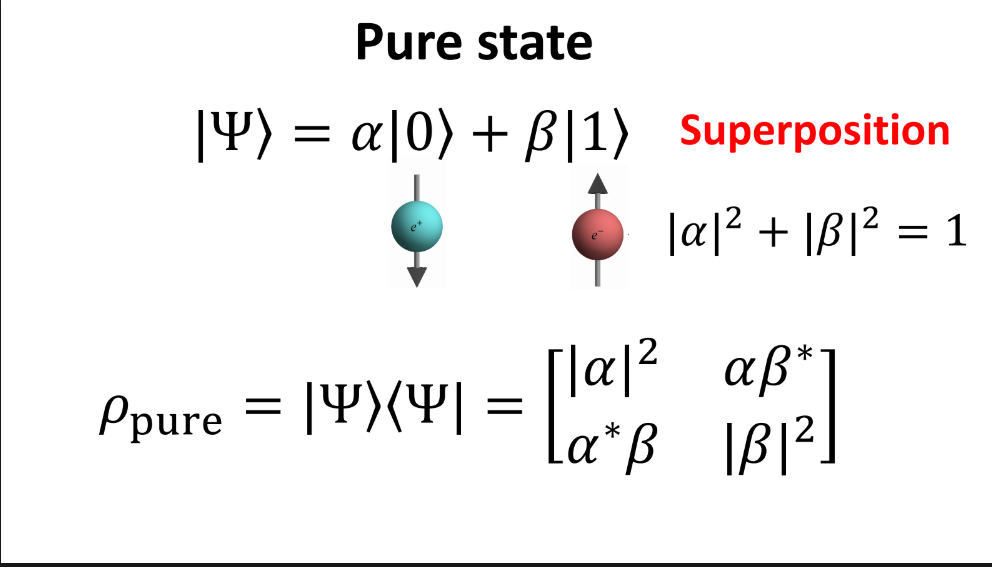
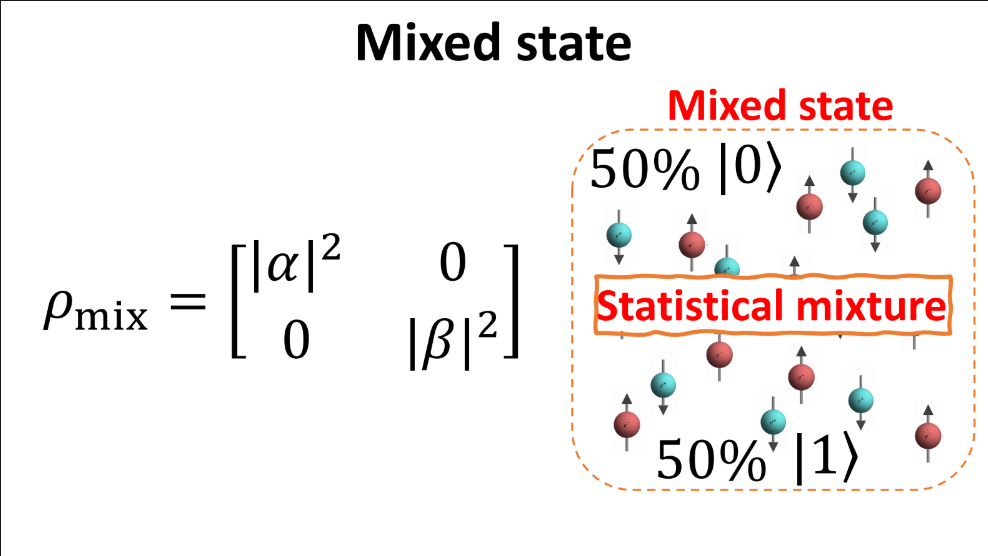

(**Image Source:** Screenshots from *Illustrating the difference between pure coherent and mixed states* by Professor Nano)

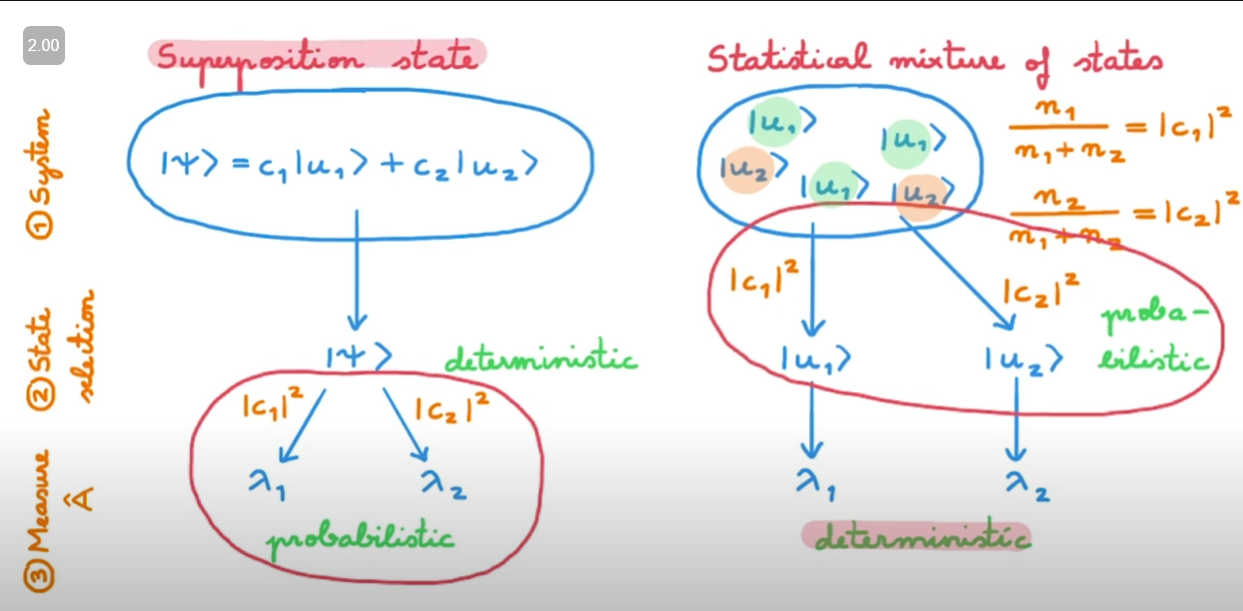

(**Image Source:** Screenshots from *Pure vs. mixed quantum states* by Professor M does Science)
* Describing Subsystems: When a quantum system is entangled with another system, and we are only interested in one part of the system, we can no longer describe its state with a simple state vector. Instead, we must use the reduced density matrix, which captures the state of the subsystem.

* Unifying Quantum and Classical Uncertainty: Density matrices naturally encode both quantum superposition and classical probability distributions. In fact, purely classical probability distributions can be represented using diagonal density matrices, making them a special case of the quantum framework.

[def]: attachment:image.png

## Definition

We say that a matrix $\rho$ is a density matrix if it satisfies the following two conditions:

* The trace of $\rho$ equals 1; Tr($\rho$)=1
    * The trace is defined for all square matrices and is defined as the sum of the diagonal elements of a matrix. An important fact about the trace is that is a LINEAR function. That is, for square matrices A and B of the same size, and for complex numbers $\alpha$ and $\beta$, we have that  $$Tr(\alpha*A+\beta*B) = \alpha*Tr(A)+\beta*Tr(B)$$

* $\rho$ is Positive Semi Definite (PSD)
    * A matrix is PSD if:
        * there exists a matrix M such that $\rho = M^\dagger M$
        * $\rho$ is Hermitian ($\rho = \rho^\dagger$) AND the eigenvalues of $\rho$ are nonnegative REAL numbers
        * $\bra{\psi}\rho\ket{\psi} \ge 0$ for every complex vector $\bra{\psi}$ having the same indices as $\rho$


We can think of the $\textit{diagonal}$ entries as the probability of each classical state appearing after performing a standard basis measurement, and the $\textit{off-diagonal}$ entries as the degree to which the two corresponding classical states of that entry are in quantum superposition, as well as their relative phase.

In [35]:
# Code from IBM Quantum's course that generates random density matrices

from qiskit.quantum_info import Statevector, Operator, DensityMatrix
from qiskit.visualization import array_to_latex
import numpy as np
from numpy import linalg

# Randomly generate a density matrix

n = 3
M = np.random.randint(-9, 10, size=(n, n)) + 1j * np.random.randint(-9, 10, size=(n, n))
P = M.conj().T @ M
rho = P/np.trace(P)

display(array_to_latex(rho))
# Initialize and display a density matrix
# using the DensityMatrix package

rho = DensityMatrix([[3/4, 1j/8],[-1j/8,1/4]])
display(rho.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Pure Quantum States

A quantum state vector $\ket{\psi}$ can be rewritten as a density matrix as follows $$\rho = \ket{\psi} \bra{\psi} $$

There are three important properties of such matrices:

* Hermitian: $$\rho^\dagger = (\ket{\psi}\bra{\psi})^\dagger = \ket{\psi}\bra{\psi} = \rho$$

* Idempotent: $$\rho^2 = (\ket{\psi}\bra{\psi})^2 = (\ket{\psi}\bra{\psi})(\ket{\psi}\bra{\psi}) = \ket{\psi}(\bra{\psi}\ket{\psi})\bra{\psi} = \ket{\psi}\bra{\psi} = \rho $$

* No Global Phase Ambiguity: Suppose we some quantum state vector $\ket{\psi}$ and another quantum state vector that differs from $\ket{\psi}$ by a global phase , say $\ket{\phi}=e^{i\theta}\ket{\psi}$. We know that the density matrix for $\ket{\psi}$ is just $\rho = \ket{\psi}\bra{\psi}$, but what about for $\ket{\phi}$? We have that 
$$\ket{\phi} = (e^{i\theta}\ket{\psi})(\bra{\psi}e^{-i\theta}) = \ket{\psi}\bra{\psi} = \rho$$ 
Hence, $\ket{\phi} = \ket{\psi}$. In other words, two quantum states are identical if and only if their density matrices are equal.

Density matrices for pure states will always have an eigenvalue equal to 1 and the rest equal to 0. 

## Convex Combinations of Density Matrices

Suppose we have $n$ quantum states with density matrices given by $\sigma_0,\dots,\sigma_{n-1}$. If we prepare a system in state $\sigma_k$ with probability $p_k$, then the resulting state is given by 
$$
\sum_{k=0}^{n-1}p_k\sigma_k
$$ 

## Bloch Sphere


A useful geometric way to represent pure states of qubits

Let's start with a quantum state vector of a qubit: $\ket{\psi}= \alpha \ket{0}+\beta \ket{1}$ . We can restrict our attention to vectors for which 
$\alpha$ is a nonnegative real number because every qubit state vector is equivalent up to a global phase to one for which $\alpha \ge0$. Thus,

$$\ket{\psi}= \alpha \ket{0}+\beta \ket{1} = \cos \left(\frac{\theta}{2}\right) \ket{0} + e^{i\phi}\sin \left(\frac{\theta}{2}\right) $$

where $\theta \in [0,\pi]$ and $\phi \in [0,2\pi)$.

The density matrix representation of this state is 
$$
    \ket{\psi}\bra{\psi} = \begin{pmatrix}
\cos^2 \left(\frac{\theta}{2}\right) & e^{-i\phi}\cos \left(\frac{\theta}{2}\right)\sin \left(\frac{\theta}{2}\right) \\
e^{i\phi}\cos \left(\frac{\theta}{2}\right)\sin \left(\frac{\theta}{2}\right) & \sin^2\left(\frac{\theta}{2}\right)
\end{pmatrix} = \begin{pmatrix}
1+\cos(\theta) & (\cos(\theta)-i\sin(\theta))\sin \theta \\
(\cos(\theta)+i\sin(\theta))\sin\theta & 1-\cos(\theta)
\end{pmatrix}
$$

This can rewritten as 
$$
\ket{\psi}\bra{\psi} = \frac{\mathbf{I}+\sin(\theta)\cos(\phi)\sigma _x+\sin(\phi)\sin(\theta)\sigma _y+\cos(\theta)\sigma _z}{2}
$$

Look at the following picture to see how this relates to the Bloch Sphere:

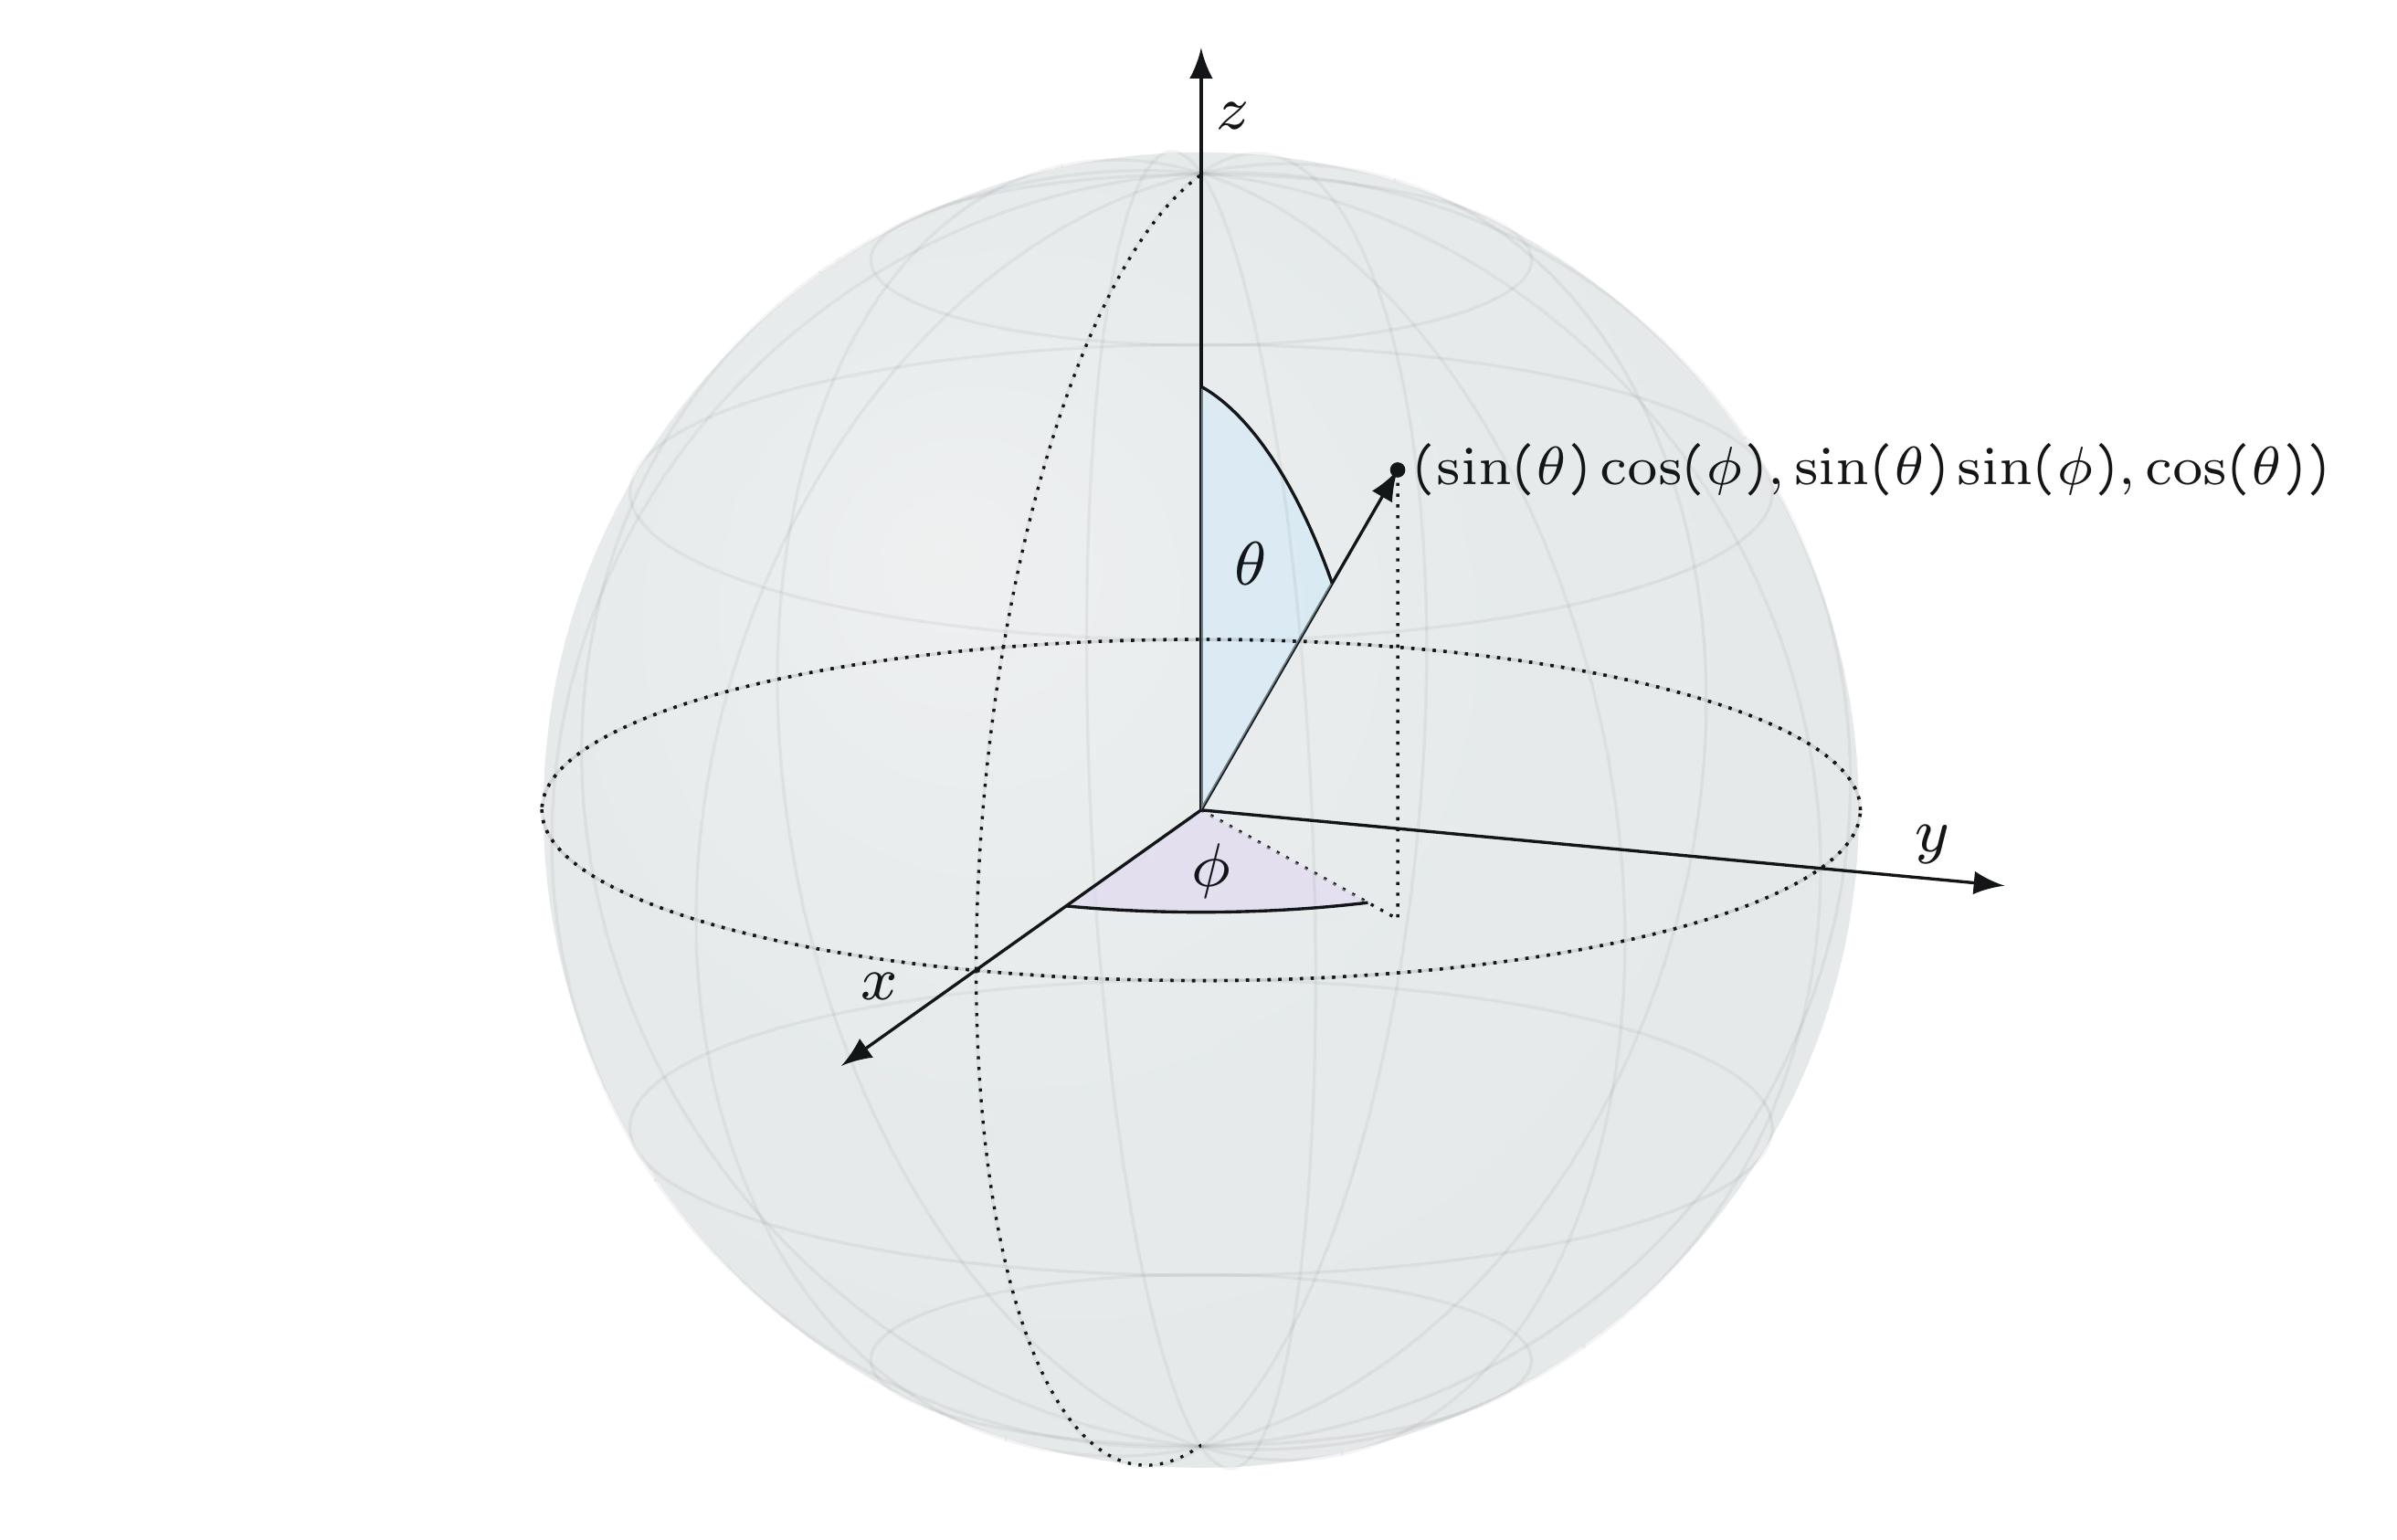   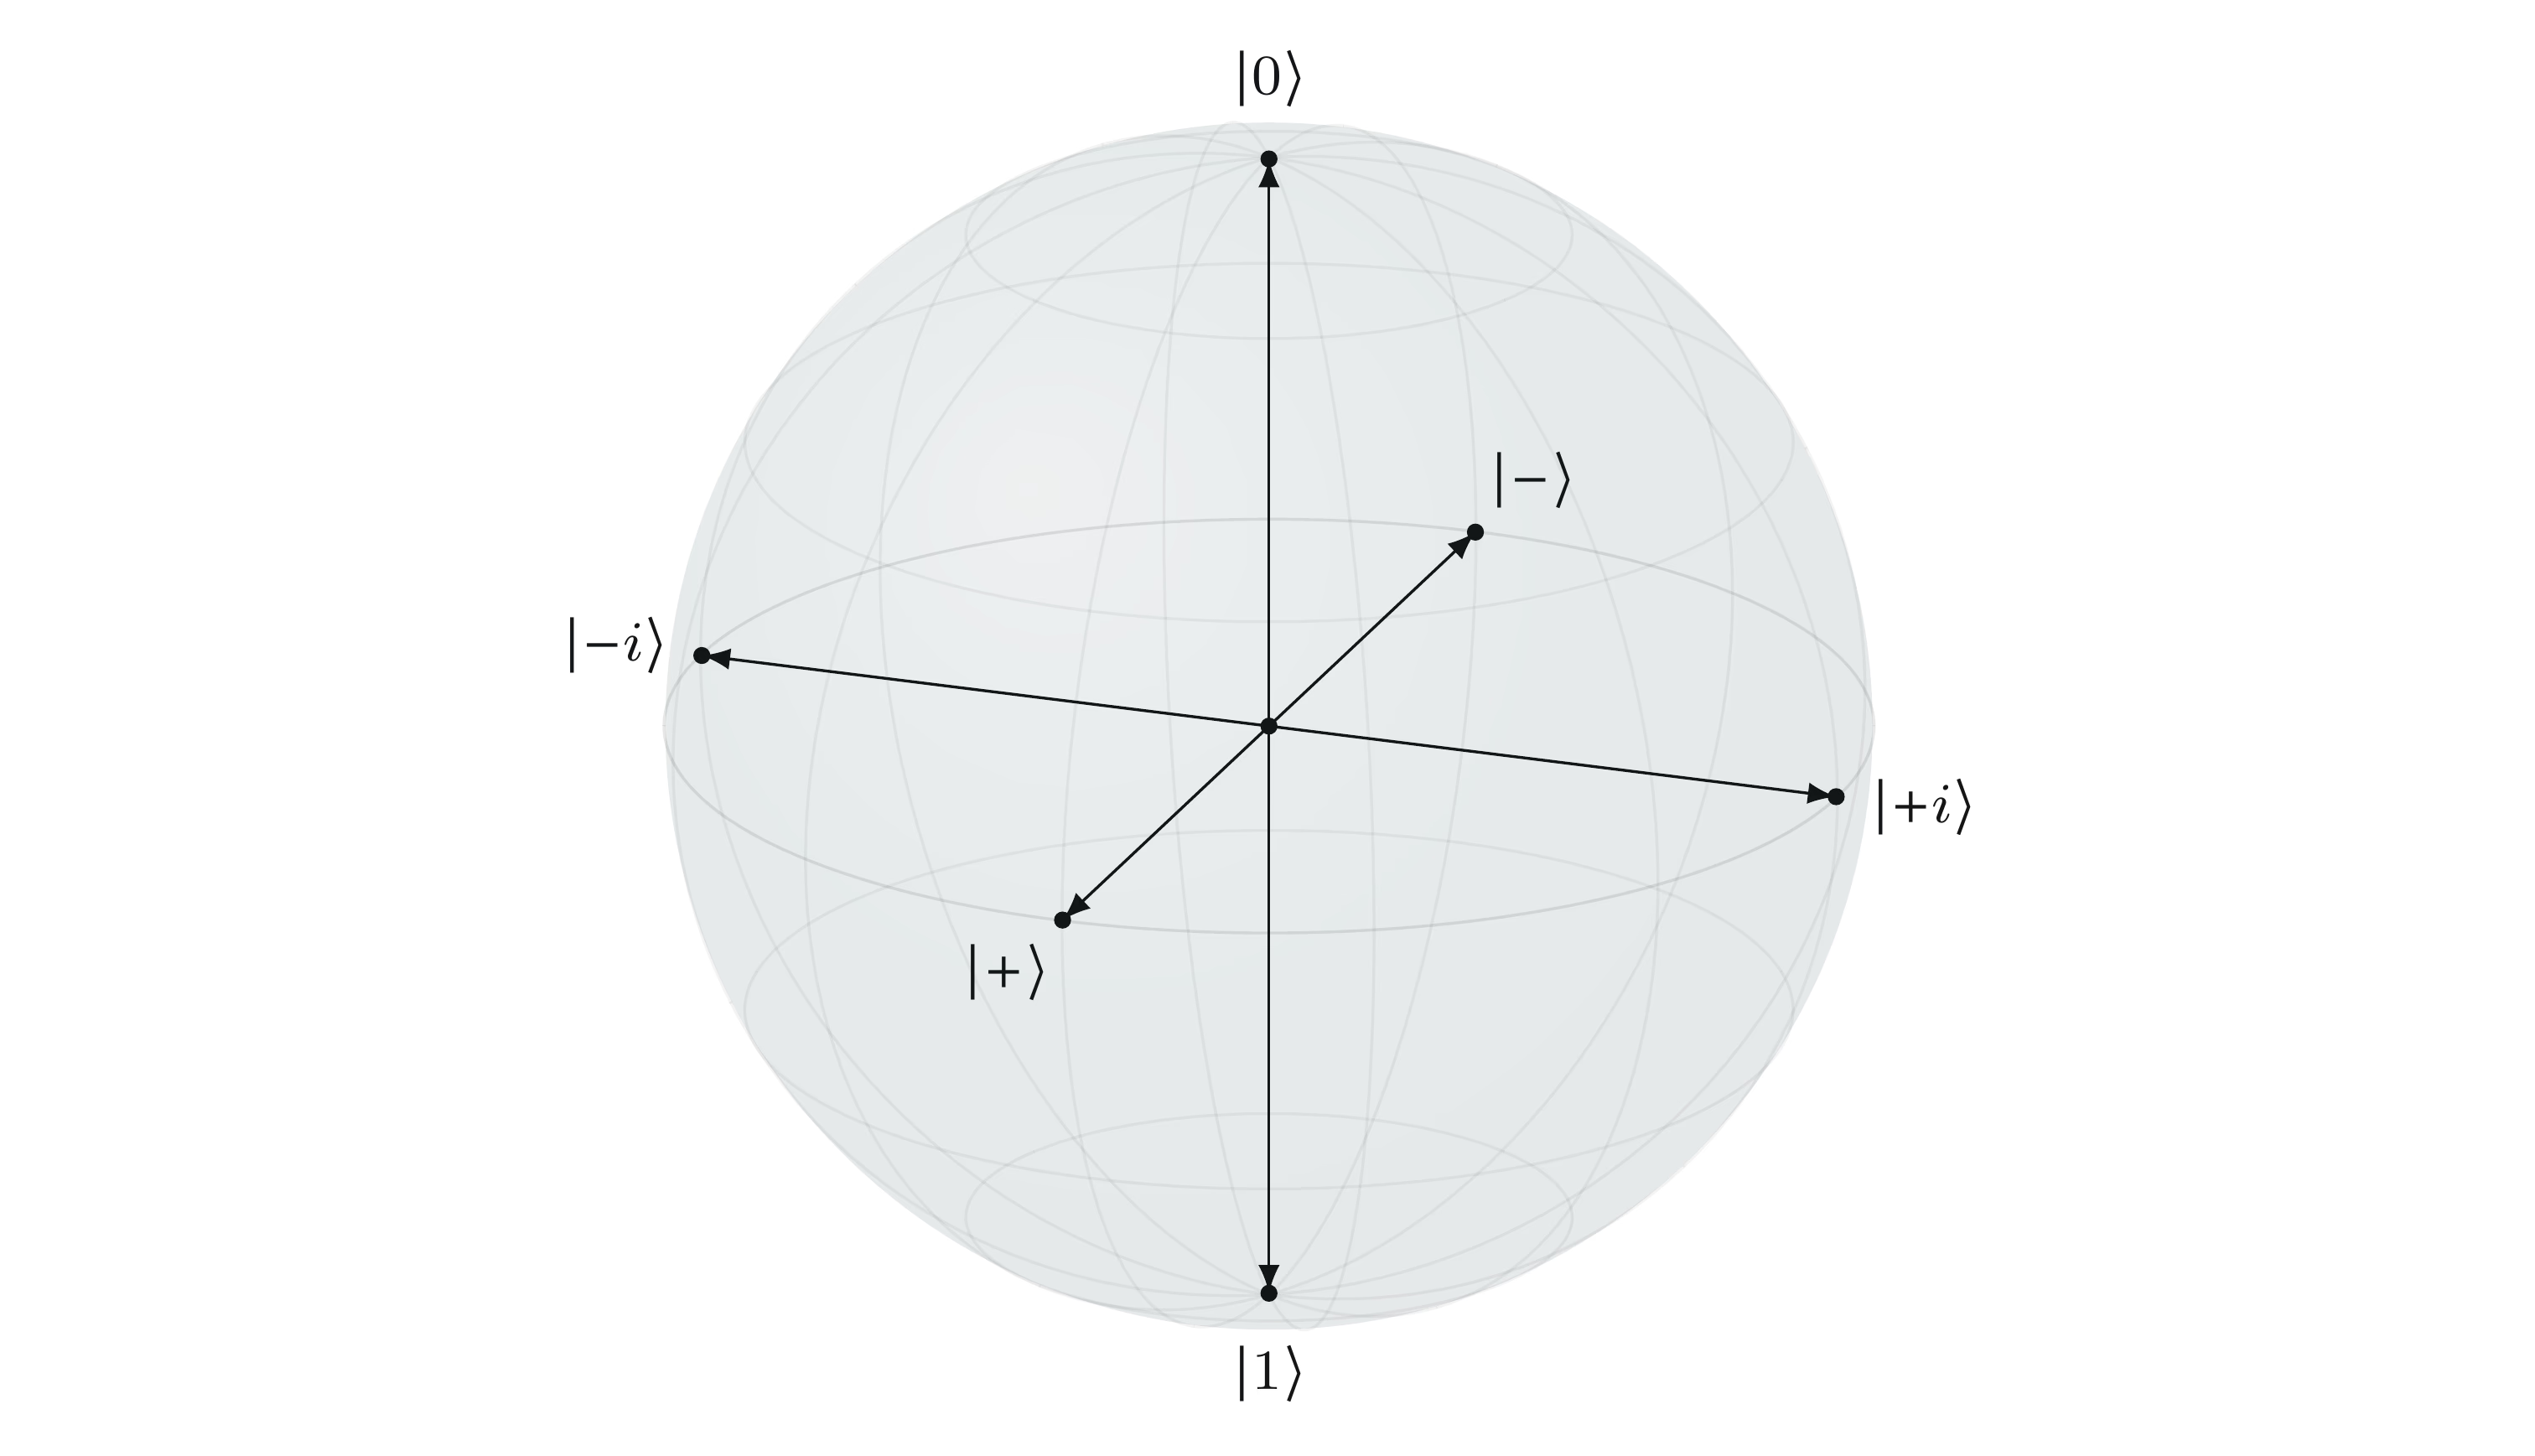


## Plotting Bloch Sphere points in Qiskit

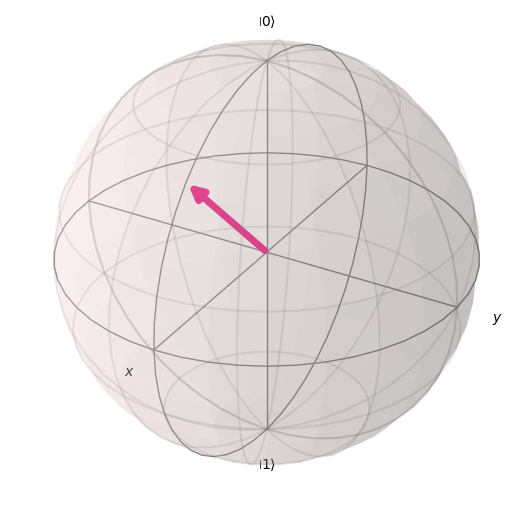

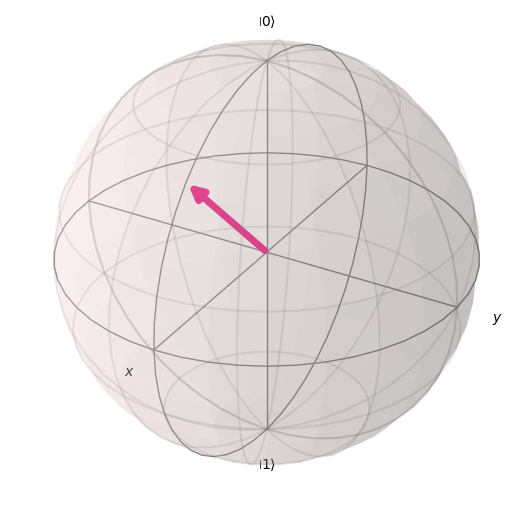

In [36]:


from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from numpy import sin, cos, pi
# Plot Bloch sphere points in Cartesian and
# spherical coordinates using plot_bloch_vector

display(plot_bloch_vector([sin(pi/4),0,cos(pi/4)]))
display(plot_bloch_vector([1, pi/4, 0], coord_type='spherical'))

## Multiple Systems and Reduced States

It's helpful to look at an example of the quantum state vector representation and the density matrix representation side by side to understand how we go from to the other. Consider the Bell States:

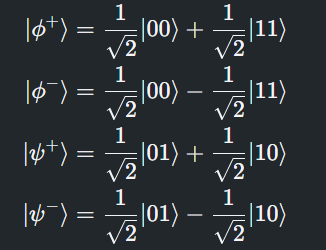  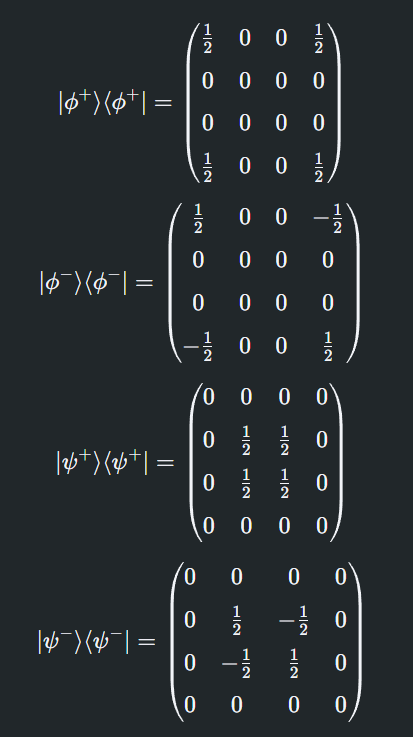

Recall that the diagonal elements should correspond to probabilities, and indeed do as the diagonal elements accurately depict the probability of being in state $\ket{00},\ket{01},\ket{10},$ or $\ket{11}$. The other elements are simply obtained from the inner product.

## Reduced states and the partial trace

One essential operation involving density matrices in multi-system settings is determining the state of a subsystem when part of the system is ignored. When multiple quantum systems are entangled, and we disregard or omit one or more of them, the remaining system is described by what is known as the **reduced state**. This reduced state is derived through a process called the **partial trace**, which extracts the relevant subsystem’s density matrix from the full system’s density matrix.

Here is the formula for the partial trace from John Watrous' Density Matrices notes:

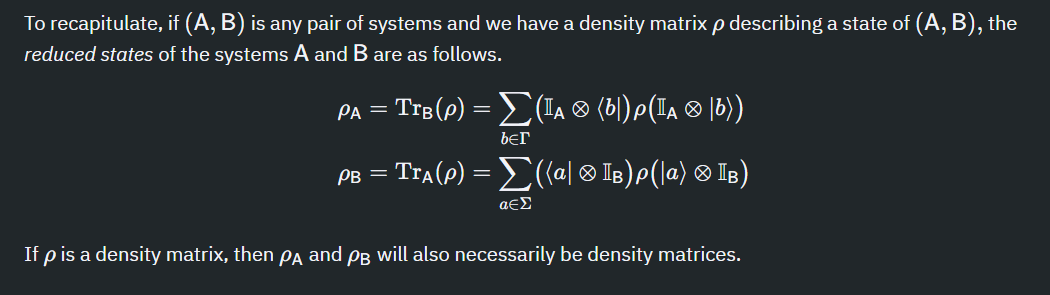

An alternative way to write this is the following:
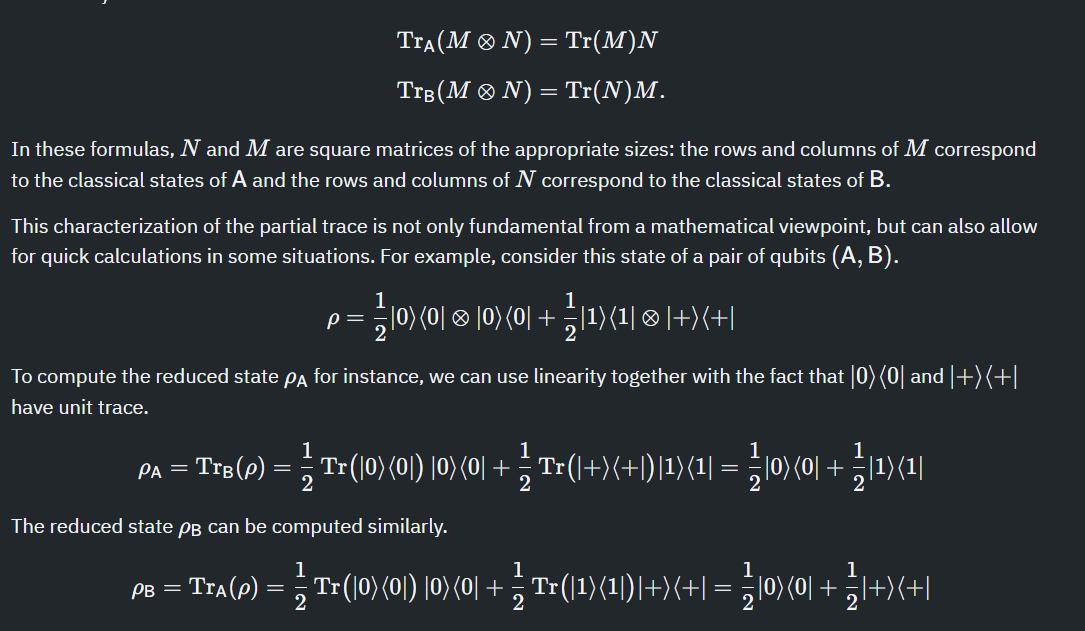